In [41]:
import pandas as pd
import numpy as np
from datetime import datetime

In [42]:
train_df = pd.read_csv('datasets/train.csv')
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [43]:
test_df = pd.read_csv('datasets/test.csv')
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [44]:
# convert 'datetime' column to datetime object
# train_df['datetime'] = pd.to_datetime(train_df['datetime'])
# test_df['datetime'] = pd.to_datetime(test_df['datetime'])

In [45]:
def get_dt(dt_str):
    return datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S')

def add_features(df):
    df['hour'] = df.datetime.apply(lambda x: get_dt(x).hour)
    df['year'] = df.datetime.apply(lambda x: get_dt(x).year)
    df['weekday'] = df.datetime.apply(lambda x: get_dt(x).weekday())
    df['month'] = df.datetime.apply(lambda x: get_dt(x).month)
    df = df.drop(columns=['datetime'])
    return df


In [46]:
train_df = add_features(train_df)
test_df = add_features(test_df)

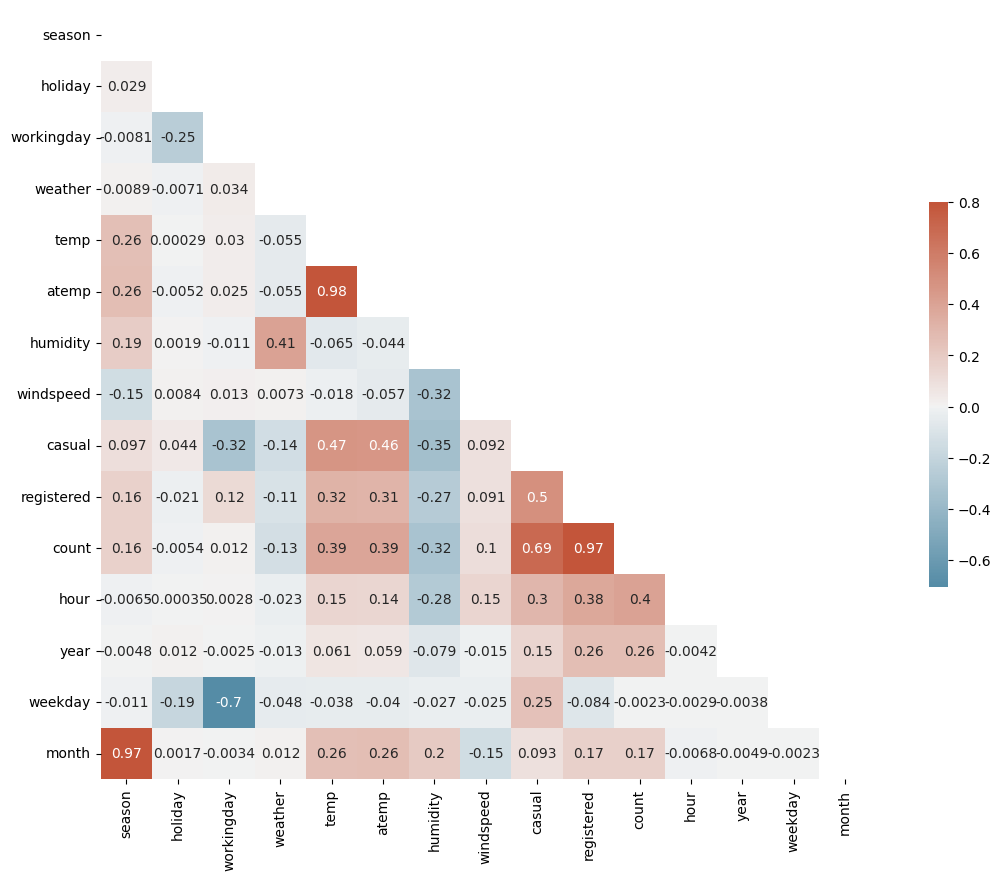

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
def correlation(df):
    corr_df = df.corr()
    mask = np.triu(np.ones_like(corr_df, dtype=bool))
    fig, ax = plt.subplots()
    fig.set_size_inches(15,10)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr_df, mask=mask, cmap=cmap, center=0, vmax=0.8, square=True, annot=True, cbar_kws={'shrink': 0.5})
correlation(train_df)